# K- Nearest Neighbour for data imputation
***
Data Imputations are processes for dealing with missing data. With large data-sets it may be practical do disregard missing data, although with smaller data-sets this may not be possible. There are many imputation methods some very easy to use but may lack accuracy such as mean, median and most frequent values, and some slower more dificult methods to impliment which are more accurate such as multivariate imputation by chained equations or estimating using machine learning models.A half-way point between these two methods that is still simple and quick to use although still brings accurracy is the K-nearest neighbour(KNN) algorithm which uses a vector distance metric to cluster kth similar data points then average the missing data points from that cluster.

The Titanic data-set has 891 entries with 177 missing from what could be a vital 'Age' feature. In this notebook the KNN algorithm using the Euclidean metric will be used to replace this missing data points, and compared using the SVM model.
***

#### Import Library's

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from math import sqrt

#### Load csv file & drop ID column

In [102]:
all_df = pd.read_csv('./titanic_train.csv', index_col=False)
# drop ID column
all_df.drop('PassengerId',axis=1,inplace=True)
all_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


#### Basic statistics for each column

In [104]:
all_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Check distribution of Age data

In [105]:
all_df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

#### Assign features to X and y
Assign features to X, drop 'ticket' and 'cabin' as they are irelevent. dropping missing data will reduce dataset to 712, assign labels to y.

In [106]:
orig_X = all_df.drop('Name', axis=1)
orig_X = orig_X.drop('Ticket', axis=1)
orig_X = orig_X.drop('Cabin', axis=1)
OX = orig_X.dropna()# drop missing data will reduce dataset to 712

# assign numeriscal label to y
Oy = OX['Survived']
OX = OX.drop('Survived', axis=1)

OX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


#### Label encoder
First , transform the class 'Sex' from thier original string representation (M and F ) into integers
transform Embarked into integers

In [107]:
le = LabelEncoder()
OX['Sex']= le.fit_transform(DX['Sex'])
OX['Embarked']= le.fit_transform(DX['Embarked'])

OX.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


#### Normalise features
Normalise the features to use  StandardScaler that scales the values using zero-mean normalisation. Why do we normalise? normalising reduces the impact of the distance metric by scaling everything to a smaller feature space.

<AxesSubplot:>

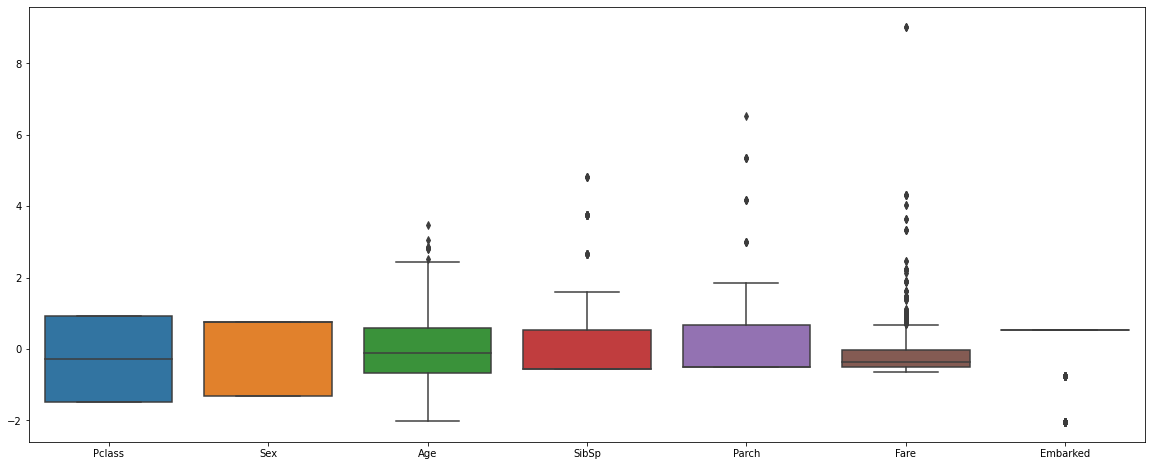

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
OX=pd.DataFrame(scaler.fit_transform(OX), columns = OX.columns)
fig, ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=OX, ax=ax)

In [109]:
model = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
model.fit(OX, Oy)

SVC(gamma='auto', probability=True)

 Now lets try k-fold cross validation, Get average of 20-fold cross-validation score using on SVM classifier.

In [110]:
n_folds = 20
#model = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
model_error = np.average(cross_val_score(model, OX, Oy, cv=n_folds))
print('The {}-fold cross-validation accuracy score for this classifier is {:2f}'.format(n_folds,model_error))

The 20-fold cross-validation accuracy score for this classifier is 0.819048


In [111]:
DX.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.908600,0.756138,-0.527669,0.522511,-0.506787,-0.516380,0.519588
1,-1.482983,-1.322511,0.577094,0.522511,-0.506787,0.694046,-2.049487
2,0.908600,-1.322511,-0.251478,-0.552714,-0.506787,-0.503620,0.519588
3,-1.482983,-1.322511,0.369951,0.522511,-0.506787,0.350326,0.519588
4,0.908600,0.756138,0.369951,-0.552714,-0.506787,-0.501257,0.519588


# Data Imputation
***
Repeat the model after data imputation, using KNN algorithm.

In [112]:
Imp_X = orig_X
# assign numerical label to y
Imp_y = Imp_X['Survived']
Imp_X = Imp_X.drop('Survived', axis=1)

Imp_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [113]:
le = LabelEncoder()
Imp_X['Sex']= le.fit_transform(Imp_X['Sex'])
Imp_X['Embarked']= le.fit_transform(Imp_X['Embarked'])

Imp_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [114]:
Imp_X['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:>

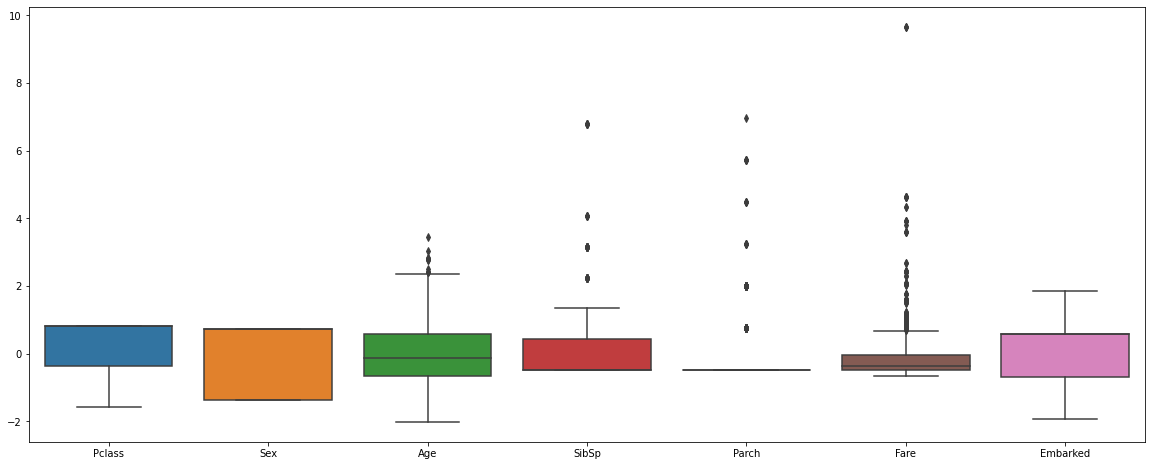

In [115]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
IX=pd.DataFrame(scaler.fit_transform(Imp_X), columns = Imp_X.columns)
fig, ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=IX, ax=ax)

## KNN for data imputation
***
Calculate the Euclidean distance between two vectors

In [116]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

Locate the most similar neighbors

In [117]:
def get_neighbours(data, row, K):
    distances = list()
    for data_row in data:
        dist = euclidean_distance(row, data_row)
        distances.append((data_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbours = list()
    for i in range(K):
        neighbours.append(distances[i][0])
    return neighbours

Calculate average of missing features 

In [118]:
def get_avg(neighbours,col):
    sum = 0
    for i in range(len(neighbours)):
        sum += neighbours[i][col]
    return sum / len(neighbours)

Transform dataframe into numPy array for calculations

In [119]:
InX = IX.to_numpy()

Create a for loop to replace the missing data.

In [120]:
for i in range(len(InX)):
    k = 5
    neighbours=list()
    if np.isnan(InX[i][2]) == True:
        avg=0
        neighbours = get_neighbours(InX, InX[i], k)
        avg = get_avg(neighbours, 2)
        InX[i][2] = avg
    

Transform back to dataframe for training and evaluation

In [121]:
IdX = pd.DataFrame(InX, columns= IX.columns)
IdX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    float64
 1   Sex       891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    float64
 4   Parch     891 non-null    float64
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    float64
dtypes: float64(7)
memory usage: 48.9 KB


Check to see if the age feature has change much.

In [122]:
IdX['Age'].describe()

count    891.000000
mean       0.020539
std        0.896633
min       -2.016979
25%       -0.530377
50%        0.103393
75%        0.365167
max        3.465126
Name: Age, dtype: float64

#### Create second model

In [125]:
model.fit(IdX, Iy)

SVC(gamma='auto', probability=True)

Now lets try k-fold cross validation
Get average of 20-fold cross-validation score using on SVM classifier.

In [124]:
n_folds = 20
model_error = np.average(cross_val_score(model, IdX, Iy, cv=n_folds))
print('The {}-fold cross-validation accuracy score for this classifier is {:2f}'.format(n_folds,model_error))

The 20-fold cross-validation accuracy score for this classifier is 0.822652


# Conlusion

Although that the increase in generalisation error loss was not massive, on a bigger data set this could be a bigger difference. however the results show that KNN is very easy to implement and should improve results if needed.